**INTRO TO XML**: https://www.w3schools.com/xml/xml_tree.asp

## **STEP 1: Importing packages and Reading Data**    

### **IMPORTING PACKAGES**

**Below is the steps we would go through to load, view and visualize any xml data into a pandas dataframe.**  


In [1]:
import requests                               #makes data from URLs easy to gather
import xml.etree.ElementTree as ET            #stores hierarchical structures from XML
import csv
import pandas as pd

**We add python packages we require.**  

In [2]:
from IPython.display import display, HTML
import nltk                                   #natural language toolkit; helpful for string data
from nltk.tokenize import word_tokenize
#nltk.download('punkt')
from wordcloud import WordCloud, STOPWORDS    #visualizing word in cloud
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm as cm               #correlation map
#from pydoc import help
from scipy.stats.stats import pearsonr        #pearson correlation
from scipy.stats import ttest_ind, ttest_rel
from collections import Counter
from scipy import stats
import seaborn as sns           # required for data visualization purposes.

### **READING DATA**  

**Converting XML to pandas dataframe to be able to manipulate data.**


In [3]:
#PARSING THROUGH XML FILE

"""


#no output achieved; parsing through file saved on machine
#code from Shreya

tree = ET.parse('../Desktop/Data/plant_catalog.xml')
root = tree.getroot()
#for child in root:
#    print child.tag, child.attrib, child.text

#print root.tag
#print root.attrib

dict_to_df = {}
for neighbor in root.findall('PLANT/PLANT'):
    print neighbor.tag, neighbor.attrib
    for child in neighbor:
       # print child.tag, child.attrib, child.text
        if (child.tag not in dict_to_df):
            dict_to_df[child.tag]=[child.text]
        else:
            dict_to_df[child.tag].append(child.text)
        print dict_to_df
for key, array in dict_to_df.items():
    print key,len(array)
    
"""

#obtained most code from http://www.austintaylor.io/lxml/python/pandas/xml/dataframe/2016/07/08/convert-xml-to-pandas-dataframe/
#https://www.w3schools.com/xml/xml_examples.asp

# another dataset: user_agent_url = 'https://www.w3schools.com/xml/simple.xml'
user_agent_url = 'https://www.w3schools.com/xml/plant_catalog.xml'
xml_data = requests.get(user_agent_url).content

class XML2DataFrame:

    def __init__(self, xml_data):                    #reading into file
        self.root = ET.XML(xml_data)

        
    
    def parse_root(self, root):                      #list of dictionaries and attributes of the children under this XML root.           
        return [self.parse_element(child) for child in iter(root)]

    
    def parse_element(self, element, parsed=None):   #Collect {key:attribute} and {tag:text} from XML elements and all children into a single dictionary of strings.
        if parsed is None:
            parsed = dict()
        for key in element.keys():
            parsed[key] = element.attrib.get(key)
        if element.text:
            parsed[element.tag] = element.text
        
        for child in list(element):                  #apply recursion
            self.parse_element(child, parsed)
        return parsed

    def process_data(self):                          #Initiate the root XML, parse it, and return a dataframe
        structure_data = self.parse_root(self.root)
        return pd.DataFrame(structure_data)

xml2df = XML2DataFrame(xml_data)
xml_df = xml2df.process_data()
del xml_df['PLANT']                                  #removed "PLANT" column since just a divider
display(HTML(xml_df.to_html()))



,AVAILABILITY,BOTANICAL,COMMON,LIGHT,PRICE,ZONE
0,031599,Sanguinaria canadensis,Bloodroot,Mostly Shady,$2.44,4
1,030699,Aquilegia canadensis,Columbine,Mostly Shady,$9.37,3
2,051799,Caltha palustris,Marsh Marigold,Mostly Sunny,$6.81,4
3,030699,Caltha palustris,Cowslip,Mostly Shady,$9.90,4
4,012099,Dicentra cucullaria,Dutchman's-Breeches,Mostly Shady,$6.44,3
5,041899,Asarum canadense,"Ginger, Wild",Mostly Shady,$9.03,3
6,012699,Hepatica americana,Hepatica,Mostly Shady,$4.45,4
7,010299,Hepatica americana,Liverleaf,Mostly Shady,$3.99,4
8,020199,Arisaema triphyllum,Jack-In-The-Pulpit,Mostly Shady,$3.23,4
9,060599,Podophyllum peltatum,Mayapple,Mostly Shady,$2.98,3


## **STEP 2: GATHERING BASIC INFO**  

### 2A:   .info()
**To get basic info from the dataset, we use .info()**

In [4]:
xml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
AVAILABILITY    36 non-null object
BOTANICAL       36 non-null object
COMMON          36 non-null object
LIGHT           36 non-null object
PRICE           36 non-null object
ZONE            36 non-null object
dtypes: object(6)
memory usage: 1.8+ KB


### 2B:   .dtypes()
**To get datatypes of each column, we can use .dtypes**  

In [5]:
#xml_df.dtypes()

### 2C:   .describe()

**To get more details about each column, we can use .describe()**  

In [6]:
xml_df.describe()

,AVAILABILITY,BOTANICAL,COMMON,LIGHT,PRICE,ZONE
count,36,36,36,36,36,36
unique,32,25,36,6,36,8
top,020199,Erythronium americanum,Mayapple,Mostly Shady,$9.03,4
freq,3,3,1,13,1,15


### 2D:   .isnull().sum()

**COUNTING NUMBER OF EMPTY VALUES IN COLUMN**  
   
**We can check the number of null values a column has by using .isnull().sum()**  

In [7]:
xml_df.isnull().sum()

AVAILABILITY    0
BOTANICAL       0
COMMON          0
LIGHT           0
PRICE           0
ZONE            0
dtype: int64

### 2E:   .nunique()

**SEE NUMBER OF UNIQUE VALUES IN COLUMN**  
  
**It is useful to see the number of unique values in each column using .nunique()**  

In [8]:
xml_df.nunique()

AVAILABILITY    32
BOTANICAL       25
COMMON          36
LIGHT            6
PRICE           36
ZONE             8
dtype: int64

### 2F:   .value_counts()


In [9]:
xml_df.LIGHT.value_counts()

Mostly Shady    13
Shade           12
Sun or Shade     6
Sunny            3
Mostly Sunny     1
Sun              1
Name: LIGHT, dtype: int64

## **STEP 3: CLEANING DATA INTO READABLE FORMAT**  
  
### 3A:  XML cleaning

**To see more from the data it has to be cleaned. Cleaning data is usally unique to each dataset.**  

## **STEP 4: MANIPULATING DATA**  

### Groupby

**Here we see region and climate have a good number of unique values to order by, therefore we can group by these columns and make good visualizations**  

In [10]:
group = xml_df.groupby(["LIGHT"])
for key,item in group:
    display(HTML(group.get_group(key).to_html()))

,AVAILABILITY,BOTANICAL,COMMON,LIGHT,PRICE,ZONE
0,031599,Sanguinaria canadensis,Bloodroot,Mostly Shady,$2.44,4
1,030699,Aquilegia canadensis,Columbine,Mostly Shady,$9.37,3
3,030699,Caltha palustris,Cowslip,Mostly Shady,$9.90,4
4,012099,Dicentra cucullaria,Dutchman's-Breeches,Mostly Shady,$6.44,3
5,041899,Asarum canadense,"Ginger, Wild",Mostly Shady,$9.03,3
6,012699,Hepatica americana,Hepatica,Mostly Shady,$4.45,4
7,010299,Hepatica americana,Liverleaf,Mostly Shady,$3.99,4
8,020199,Arisaema triphyllum,Jack-In-The-Pulpit,Mostly Shady,$3.23,4
9,060599,Podophyllum peltatum,Mayapple,Mostly Shady,$2.98,3
12,020199,Claytonia Virginica,Spring-Beauty,Mostly Shady,$6.59,7


,AVAILABILITY,BOTANICAL,COMMON,LIGHT,PRICE,ZONE
2,051799,Caltha palustris,Marsh Marigold,Mostly Sunny,$6.81,4


,AVAILABILITY,BOTANICAL,COMMON,LIGHT,PRICE,ZONE
15,020199,Erythronium americanum,"Violet, Dog-Tooth",Shade,$9.04,4
16,032499,Erythronium americanum,Trout Lily,Shade,$6.94,4
17,041399,Erythronium americanum,Adder's-Tongue,Shade,$9.58,4
20,050399,Monarda didyma,Bee Balm,Shade,$4.59,4
21,042799,Monarda didyma,Bergamot,Shade,$7.16,4
23,061099,Ranunculus,Buttercup,Shade,$2.57,4
24,040399,Ranunculus,Crowfoot,Shade,$9.34,4
26,052599,Potentilla,Cinquefoil,Shade,$7.06,Annual
30,022199,Polemonium caeruleum,Jacob's Ladder,Shade,$9.26,Annual
31,071499,Polemonium caeruleum,Greek Valerian,Shade,$4.36,Annual


,AVAILABILITY,BOTANICAL,COMMON,LIGHT,PRICE,ZONE
32,032799,Eschscholzia californica,California Poppy,Sun,$7.89,Annual


,AVAILABILITY,BOTANICAL,COMMON,LIGHT,PRICE,ZONE
10,012299,Phlox divaricata,"Phlox, Woodland",Sun or Shade,$2.80,3
11,021699,Phlox divaricata,"Phlox, Blue",Sun or Shade,$5.59,3
13,042999,Trillium grandiflorum,Trillium,Sun or Shade,$3.90,5
14,022199,Trillium grandiflorum,Wake Robin,Sun or Shade,$3.20,5
28,051899,Gentiana,Gentian,Sun or Shade,$7.81,4
29,050299,Gentiana,Blue Gentian,Sun or Shade,$8.56,4


,AVAILABILITY,BOTANICAL,COMMON,LIGHT,PRICE,ZONE
22,061899,Rudbeckia hirta,Black-Eyed Susan,Sunny,$9.80,Annual
25,063099,Asclepias tuberosa,Butterfly Weed,Sunny,$2.78,Annual
27,013099,Oenothera,Primrose,Sunny,$6.56,3 - 5


### Tokenizing

In [11]:
#adds tokens to a list
tokens = xml_df['LIGHT']. apply(word_tokenize) 
#tokens_list = tokens.tolist()
print xml_df['LIGHT']
print tokens

flattened_list = []
for x in tokens:
    for y in x:
        flattened_list.append(y)

print "\n"
print flattened_list
print "\n"
print flattened_list.count('Sun')
print "\n"
print flattened_list.count('Shade')

0     Mostly Shady
1     Mostly Shady
2     Mostly Sunny
3     Mostly Shady
4     Mostly Shady
5     Mostly Shady
6     Mostly Shady
7     Mostly Shady
8     Mostly Shady
9     Mostly Shady
10    Sun or Shade
11    Sun or Shade
12    Mostly Shady
13    Sun or Shade
14    Sun or Shade
15           Shade
16           Shade
17           Shade
18    Mostly Shady
19    Mostly Shady
20           Shade
21           Shade
22           Sunny
23           Shade
24           Shade
25           Sunny
26           Shade
27           Sunny
28    Sun or Shade
29    Sun or Shade
30           Shade
31           Shade
32             Sun
33    Mostly Shady
34           Shade
35           Shade
Name: LIGHT, dtype: object
0      [Mostly, Shady]
1      [Mostly, Shady]
2      [Mostly, Sunny]
3      [Mostly, Shady]
4      [Mostly, Shady]
5      [Mostly, Shady]
6      [Mostly, Shady]
7      [Mostly, Shady]
8      [Mostly, Shady]
9      [Mostly, Shady]
10    [Sun, or, Shade]
11    [Sun, or, Shade]
12     [Mostl

### Label Encoding & Binary
reassigning column object to become category --> assign encoded value to different outputs in column

In [12]:
#fixing 'PRICE'
xml_df['PRICE'] = xml_df['PRICE'].str.replace('$', '')   #remove "$" from "PRICE" to make into integar
xml_df['PRICE'] = xml_df['PRICE'].astype(float)          #converts 'PRICE' from obj to float


#LABEL ENCODING
xml_df['LIGHT']= xml_df['LIGHT'].astype('category')      #convert 'LIGHT' from obj to category
xml_df["LIGHT_LE"] = xml_df["LIGHT"].cat.codes              #label encoding


xml_df['ZONE']= xml_df['ZONE'].astype('category')      #convert 'LIGHT' from obj to category
xml_df["ZONE_LE"] = xml_df["ZONE"].cat.codes              #label encoding


#BINARY- creates binary where one type is 1 and everything else in row is 0
#http://pbpython.com/categorical-encoding.html
xml_df["ZONE_binary"] = np.where(xml_df["ZONE"].str.contains("4"), 1, 0)



display(HTML(xml_df.to_html()))

,AVAILABILITY,BOTANICAL,COMMON,LIGHT,PRICE,ZONE,LIGHT_LE,ZONE_LE,ZONE_binary
0,031599,Sanguinaria canadensis,Bloodroot,Mostly Shady,2.44,4,0,3,1
1,030699,Aquilegia canadensis,Columbine,Mostly Shady,9.37,3,0,1,0
2,051799,Caltha palustris,Marsh Marigold,Mostly Sunny,6.81,4,1,3,1
3,030699,Caltha palustris,Cowslip,Mostly Shady,9.90,4,0,3,1
4,012099,Dicentra cucullaria,Dutchman's-Breeches,Mostly Shady,6.44,3,0,1,0
5,041899,Asarum canadense,"Ginger, Wild",Mostly Shady,9.03,3,0,1,0
6,012699,Hepatica americana,Hepatica,Mostly Shady,4.45,4,0,3,1
7,010299,Hepatica americana,Liverleaf,Mostly Shady,3.99,4,0,3,1
8,020199,Arisaema triphyllum,Jack-In-The-Pulpit,Mostly Shady,3.23,4,0,3,1
9,060599,Podophyllum peltatum,Mayapple,Mostly Shady,2.98,3,0,1,0


In [13]:
#finds how many times a word is repeated in given column
xml_df.LIGHT.str.split(expand=True).stack().value_counts()

Shade     18
Mostly    14
Shady     13
Sun        7
or         6
Sunny      4
dtype: int64

## **STEP 5: DATA VISUALIZATION**  
  
**Using matplotlib.pyplot to make bar charts**

### 5A:   **General Plot**  
  
**Let us try to visualize all the data at once**  

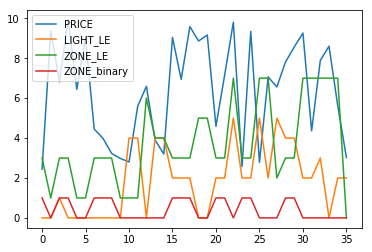

In [14]:
a = xml_df.plot()
plt.show()

### 5B:   **Log Plot**  


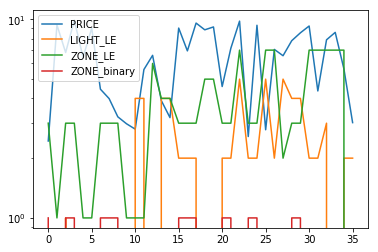

In [15]:
xml_df.plot()
plt.yscale('log')

### 5C:   **Histogram**  

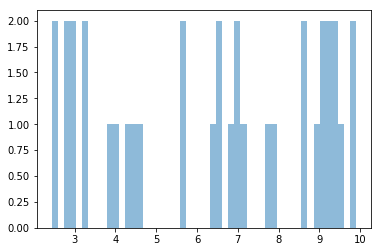

In [16]:
x = xml_df["PRICE"]
num_bins = 50
n, bins, patches = plt.hist(x, num_bins, alpha=0.5)

### 5D:   **Scatter Plot**  


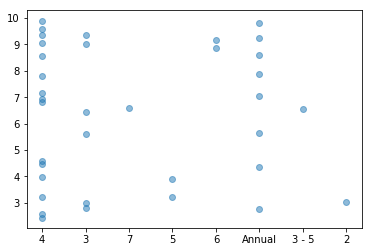

In [17]:
x = xml_df['ZONE']
y = xml_df['PRICE']
plt.scatter(x, y, alpha=0.5)

### 5E:   **Bar Graph**  

*NUMBER OF OCCURANCES OF EACH VALUE IN COLUMN*  
  
**A good way to visualize data of a column you wish to group by is to use .value_counts()**  
  
**It gives a clear picture of how many would be in each group etc.**  

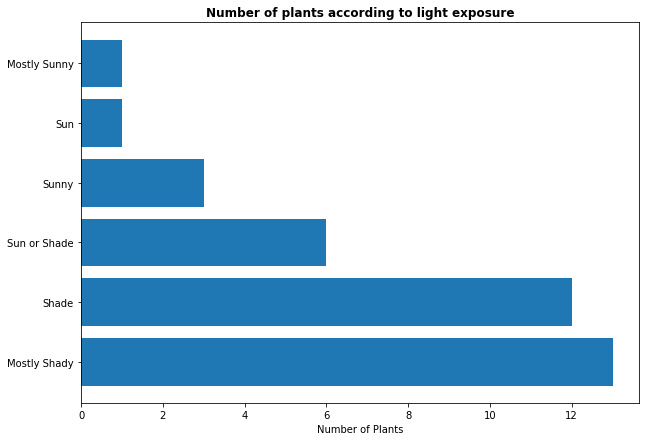

In [18]:
##import matplotlib.pyplot as plt; plt.rcdefaults()
#want to make more than one category

light = xml_df['LIGHT'].value_counts()
plt.figure(figsize=(10,7))

plt.barh(np.arange(len(light.index)), light.values)
plt.yticks(np.arange(len(light.index)), light.index)
plt.xlabel('Number of Plants')
plt.title('Number of plants according to light exposure', fontweight = 'bold')
plt.savefig('barh.png', bbox_inches="tight")
plt.show()

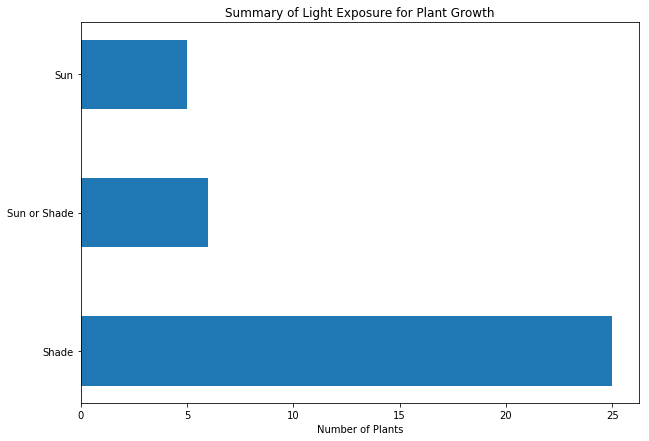

In [19]:
#combining categories

#initializing new categories
count_sun = (xml_df['LIGHT'] == 'Sunny').sum() + (xml_df['LIGHT'] == 'Mostly Sunny').sum() + (xml_df['LIGHT'] == 'Sun').sum()
count_SunOrShade = (xml_df['LIGHT'] == 'Sun or Shade').sum()
count_shade = (xml_df['LIGHT'] == 'Shade').sum() + (xml_df['LIGHT'] == 'Mostly Shady').sum()


categories = ['Shade', 'Sun or Shade', 'Sun']
y_pos = np.arange(len(categories))
height = [count_shade, count_SunOrShade, count_sun]

plt.figure(figsize=(10,7))
width = 0.5
plt.barh(y_pos, height, width)
plt.yticks(y_pos, categories)
plt.xlabel('Number of Plants')
plt.title('Summary of Light Exposure for Plant Growth')
plt.tight_layout
plt.show()              


### 5F:   **Heatmap**  


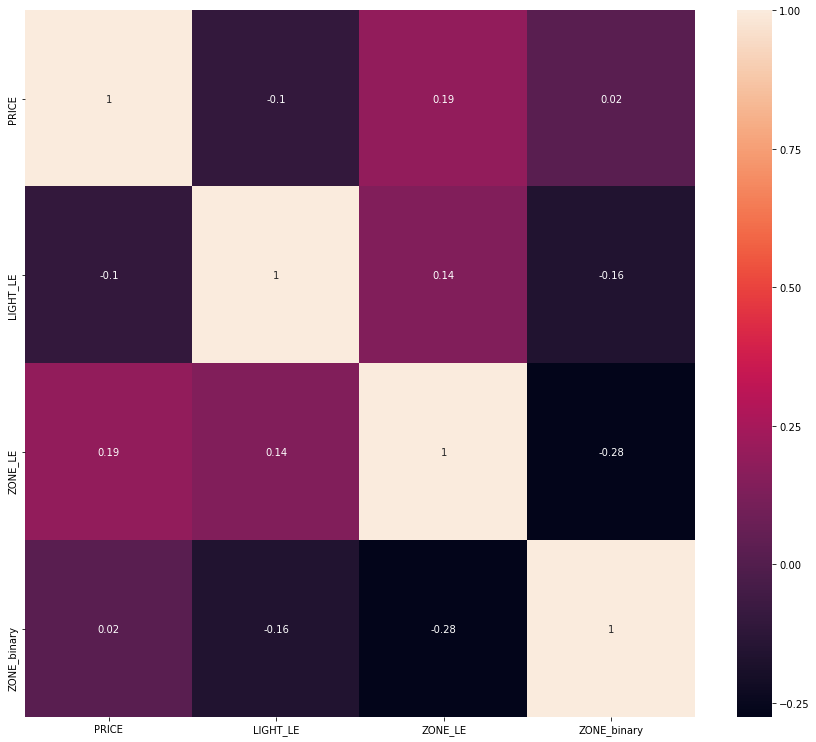

In [20]:
f,ax = plt.subplots(figsize=(15, 13))
sns.heatmap(xml_df.corr(), annot=True, ax=ax)
plt.show()

### 5I:   **Wordcloud**  


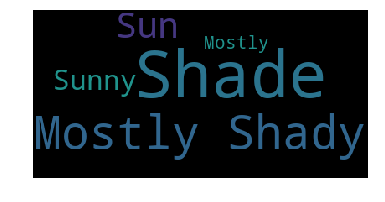

In [21]:
#WORDCLOUD - creating word cloud to visualize frequency of word used


wordcloud = WordCloud().generate(' '.join(xml_df['LIGHT']))
#wordcloud = WordCloud().generate(' '.join(xml_df['BOTANICAL']))

plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('wordcloud.png', bbox_inches="tight")
plt.show()

## STEP 6: STATISTICAL TESTING


**There's always independent (eg gender) and dependent variable (eg test scores). If independent variable has more than one outcome, use ANOVA, otherwise use t-test. Testing done to determine to what degree of confidence the difference between means of 2 groups did not occur by chance.**

### T-Test

**Used to determine if there's significant difference between the mean of 2 groups. infer that dependent variable fits normal distribution so we can always predict what the outcome is.** 
- **larger t score -> larger difference between both groups**
- **smaller p value -> less probability that results were by chance**

**ANOVA: similar to t-test but used if comparing means of more than 2 populations**



In [22]:
#t-test
#2 independent samples
#returns (t-score, two-tailed p-value)


cat1 = xml_df['LIGHT_LE']
cat2 = xml_df['ZONE_LE']

ttest_ind(cat1, cat2)



#t-test
#2 dependent samples
#returns (t-score, two-tailed p-value)

#ttest_rel(cat3, cat4)

Ttest_indResult(statistic=-3.9756150768752128, pvalue=0.00016866606891517604)

### **Pearson  Correlation**

**Gives strongest linear correlation between 2 groups, expressed in terms of r [-1,+1] where 0 means there's no correlation; can be either positively or negatively correlated**

In [23]:
#gives (Pearson's correlation coefficient, 2-tailed p-value)

#data = xml_df[['LIGHT','ZONE_binary']]

x = xml_df['ZONE_LE']
y = xml_df['PRICE']
pearsonr(x, y)
#correlation = data.corr(method='pearson')

(0.19293319874960782, 0.25958291200651146)

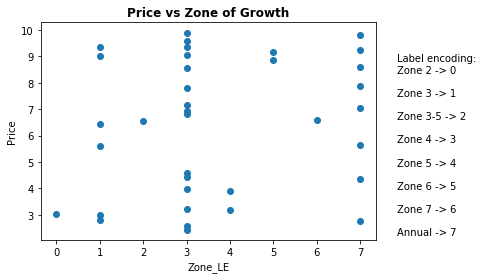

In [24]:
#import matplotlib

#matplotlib.style.use('ggplot')
x = xml_df['ZONE_LE']
y = xml_df['PRICE']
plt.scatter(x, y)
plt.xlabel('Zone_LE')
plt.ylabel('Price')
plt.title('Price vs Zone of Growth', fontweight = 'bold')
plt.figtext(.95, .1,'Label encoding: \nZone 2 -> 0\n \nZone 3 -> 1\n \nZone 3-5 -> 2\n \nZone 4 -> 3\n \nZone 5 -> 4\n \nZone 6 -> 5\n \nZone 7 -> 6\n \nAnnual -> 7\n')
plt.show()

**--------------------------------- TROUBLESHOOTING --------------------------------------**

- **Original dataset (https://data.cityofnewyork.us/api/views/kku6-nxdu.xml) had multiple tables so code used wasn't able to read through it.** 